# [데이터 불러오기]

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import img_as_float
from skimage.color import rgb2gray

In [24]:
# label == 1
scream_mel_path = 'D:\\졸프\\sound\\scream\\mel-44100-new\\scream_'

# label == 0
etc_mel_path = 'D:\\졸프\\sound\\etc\\mel-44100\\etc_'
#human_mel_path = 'D:\\졸프\\sound\\human\\mel-44100\\human_'
#crowd_mel_path = 'D:\\졸프\\sound\\crowd\\mel-44100\\crowd_'
animal_mel_path = 'D:\\졸프\\sound\\animal\\mel-44100\\animal_'

# sample 이미지 출력
sample = rgb2gray(img_as_float(imread('D:\\졸프\\sound\\scream\\mel-44100\\scream_1.png')))
print(sample.shape)

(77, 196)


# 1) Scream

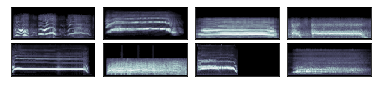

In [25]:
# 이미지 크기 = 77 * 196
screams = np.zeros(shape=(2008, 77, 196))
screams_id = np.zeros(shape=(2008))

for i in range(2008):
    num = i + 1

    mel_name = scream_mel_path + str(num) + '.png'
    screams[i] = rgb2gray(img_as_float(imread(mel_name)))
    screams_id[i] = 1 # 비명소리면 true

# sample 출력
fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

j = 1
for i in range(8):
    ax = fig.add_subplot(4, 4, j, xticks=[], yticks=[])
    mel = screams[i, :, :]
    ax.imshow(mel, cmap='bone', interpolation='nearest')
    j += 1

# 2) Etc

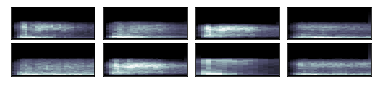

In [26]:
# 이미지 크기 = 77 * 196
etcs = np.zeros(shape=(660, 77, 196))
etcs_id = np.zeros(shape=(660))

for i in range(660):
    num = i + 1

    mel_name = etc_mel_path + str(num) + '.png'
    etcs[i] = rgb2gray(img_as_float(imread(mel_name)))
    etcs_id[i] = 0 # 비명소리가 아니면 false

# sample 출력
fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

j = 1
for i in range(8):
    ax = fig.add_subplot(4, 4, j, xticks=[], yticks=[])
    mel = etcs[i, :, :]
    ax.imshow(mel, cmap='bone', interpolation='nearest')
    j += 1

# 3) Human

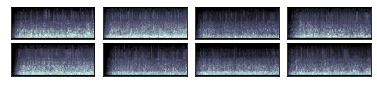

In [33]:
# 이미지 크기 = 77 * 196
humans = np.zeros(shape=(43, 77, 196))
humans_id = np.zeros(shape=(43))

for i in range(43):
    num = i + 1

    mel_name = human_mel_path + str(num) + '.png'
    humans[i] = rgb2gray(img_as_float(imread(mel_name)))
    humans_id[i] = 0 # 비명소리가 아니면 false

# sample 출력
fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

j = 1
for i in range(8):
    ax = fig.add_subplot(4, 4, j, xticks=[], yticks=[])
    mel = humans[i, :, :]
    ax.imshow(mel, cmap='bone', interpolation='nearest')
    j += 1

# 4) Crowd

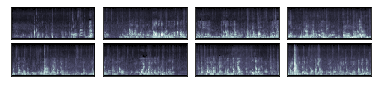

In [8]:
# 이미지 크기 = 77 * 196
crowds = np.zeros(shape=(1775, 77, 196))
crowds_id = np.zeros(shape=(1775))

for i in range(1775):
    num = i + 1

    mel_name = crowd_mel_path + str(num) + '.png'
    crowds[i] = rgb2gray(img_as_float(imread(mel_name)))
    crowds_id[i] = 0 # 비명소리가 아니면 false

# sample 출력
fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

j = 1
for i in range(8):
    ax = fig.add_subplot(4, 4, j, xticks=[], yticks=[])
    mel = crowds[i, :, :]
    ax.imshow(mel, cmap='bone', interpolation='nearest')
    j += 1

# 5) Animal

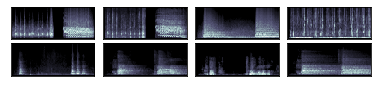

In [27]:
# 이미지 크기 = 77 * 196
animals = np.zeros(shape=(927, 77, 196))
animals_id = np.zeros(shape=(927))

for i in range(927):
    num = i + 1

    mel_name = animal_mel_path + str(num) + '.png'
    animals[i] = rgb2gray(img_as_float(imread(mel_name)))
    animals_id[i] = 0 # 비명소리가 아니면 false

# sample 출력
fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

j = 1
for i in range(8):
    ax = fig.add_subplot(4, 4, j, xticks=[], yticks=[])
    mel = animals[i, :, :]
    ax.imshow(mel, cmap='bone', interpolation='nearest')
    j += 1

# [데이터 전처리]

In [28]:
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [13]:
# 일정 비율 랜덤
from sklearn.model_selection import train_test_split

scream_train, scream_test, scream_id_train, scream_id_test = train_test_split(screams, screams_id, test_size=0.3, random_state=12)
etc_train, etc_test, etc_id_train, etc_id_test = train_test_split(etcs, etcs_id, test_size=0.3, random_state=12)
#human_train, human_test, human_id_train, human_id_test = train_test_split(humans, humans_id, test_size=0.3, random_state=12)
#crowd_train, crowd_test, crowd_id_train, crowd_id_test = train_test_split(crowds, crowds_id, test_size=0.3, random_state=12)
animal_train, animal_test, animal_id_train, animal_id_test = train_test_split(animals, animals_id, test_size=0.3, random_state=12)


x_train = np.concatenate((scream_train, etc_train, animal_train), axis=0)
x_test = np.concatenate((scream_test, etc_test, animal_test), axis=0)
y_train = np.concatenate((scream_id_train, etc_id_train, animal_id_train), axis=0)
y_test = np.concatenate((scream_id_test, etc_id_test, animal_id_test), axis=0)

# scream과 animal, etc, human 데이터를 랜덤으로 섞어줌
train_index = np.arange(x_train.shape[0])
np.random.shuffle(train_index)

test_index = np.arange(x_test.shape[0])
np.random.shuffle(test_index)

x_train = x_train[train_index]
y_train = y_train[train_index]

x_test = x_test[test_index]
y_test = y_test[test_index]


# train, test 데이터 출력
print(x_train)
print(y_train)
print(x_test)
print(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

[[[1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.13098039e-03
   1.13098039e-03 1.13098039e-03]
  [1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.13098039e-03
   1.13098039e-03 1.13098039e-03]
  [1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.13098039e-03
   1.13098039e-03 1.13098039e-03]
  ...
  [1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.13098039e-03
   1.13098039e-03 1.13098039e-03]
  [1.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]]

 [[1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.13098039e-03
   1.13098039e-03 1.13098039e-03]
  [1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.13098039e-03
   1.13098039e-03 1.13098039e-03]
  [1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.13098039e-03
   1.13098039e-03 1.13098039e-03]
  ...
  [1.00000000e+00 1.00000000e+00 2.82745098e-04 ... 1.67041176e-01
   2.01694

In [14]:
x_train = x_train.reshape(x_train.shape[0], 77, 196, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 77, 196, 1).astype('float32')

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2515, 77, 196, 1)
(1080, 77, 196, 1)
(2515, 2)
(1080, 2)


# [모델 학습]

In [45]:
MODEL_SAVE_PATH = './model/'

if not os.path.exists(MODEL_SAVE_PATH):
    os.mkdir(MODEL_SAVE_PATH)

model_path = MODEL_SAVE_PATH + 'screaming-' + '{epoch:02d}-{val_loss:.4f}.hdf5'
cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [46]:
num_classes = 2 # label = 0 or 1 (scream == 1)
input_shape = (77, 196, 1)

# raspberrypi 호환성을 위해 batch_size 작게 조정
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 75, 194, 16)       160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 73, 192, 16)       2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 96, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 36, 96, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 55296)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1769504   
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)               

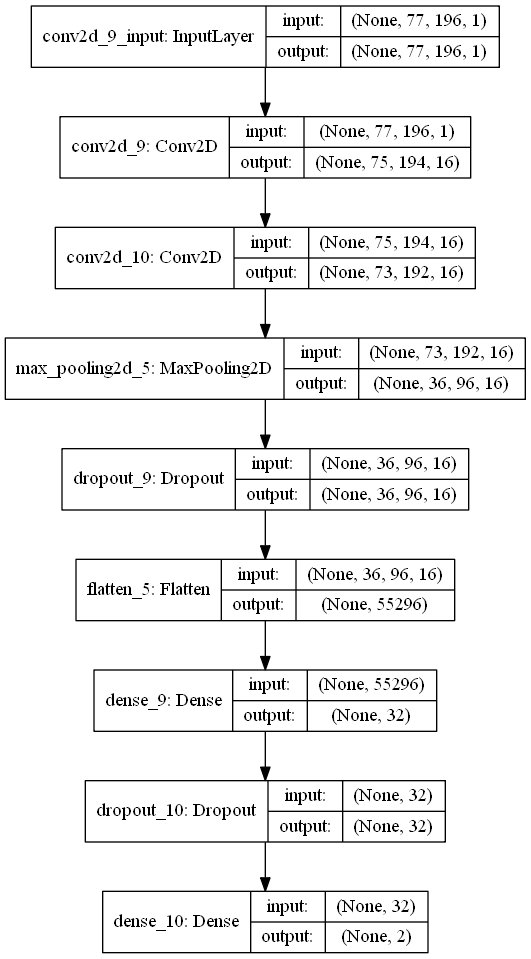

In [47]:
# 모델 출력
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)

keras.utils.vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.3,
                    epochs=100, batch_size=32, verbose=2,
                    callbacks=[cb_checkpoint, cb_early_stopping])

score = model.evaluate(x_test, y_test)

print('\nLoss: {:.4f}'.format(score[0]))
print('\nAccuracy: {:.4f}'.format(score[1]))

from tensorflow.python.keras.models import load_model
model.save('[init]cnn_scream_model.h5')

Train on 1760 samples, validate on 755 samples
Epoch 1/100
 - 7s - loss: 0.4734 - accuracy: 0.7864 - val_loss: 0.3155 - val_accuracy: 0.8808

Epoch 00001: val_loss improved from inf to 0.31547, saving model to ./model/screaming-01-0.3155.hdf5
Epoch 2/100
 - 7s - loss: 0.3190 - accuracy: 0.8773 - val_loss: 0.3069 - val_accuracy: 0.8689

Epoch 00002: val_loss improved from 0.31547 to 0.30693, saving model to ./model/screaming-02-0.3069.hdf5
Epoch 3/100
 - 7s - loss: 0.2358 - accuracy: 0.9045 - val_loss: 0.2402 - val_accuracy: 0.9099

Epoch 00003: val_loss improved from 0.30693 to 0.24016, saving model to ./model/screaming-03-0.2402.hdf5
Epoch 4/100
 - 7s - loss: 0.1778 - accuracy: 0.9341 - val_loss: 0.2235 - val_accuracy: 0.9219

Epoch 00004: val_loss improved from 0.24016 to 0.22350, saving model to ./model/screaming-04-0.2235.hdf5
Epoch 5/100
 - 7s - loss: 0.1633 - accuracy: 0.9341 - val_loss: 0.2298 - val_accuracy: 0.9152

Epoch 00005: val_loss did not improve from 0.22350
Epoch 6/100

In [55]:
# x, y 합침
x = np.concatenate((screams, etcs, animals), axis=0)
y = np.concatenate((screams_id, etcs_id, animals_id), axis=0)

x = x.reshape(x.shape[0], 77, 196, 1).astype('float32')

y = to_categorical(y, 2)

In [56]:
from sklearn.model_selection import KFold
from tensorflow.python.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fold = 5
kfold = KFold(n_splits=fold, shuffle=True, random_state=0)

# 각 fold마다 도출되는 정확도, 정밀도, 재현율, F점수를 저장할 리스트 선언
accuracy_list = np.zeros(fold)
precision_rate_list = np.zeros(fold)
recall_rate_list = np.zeros(fold)
F1_Score_list = np.zeros(fold)

# Fold마다 학습 + 검증 반복
fold_num = 1
idx = 0
for train_index, test_index in kfold.split(x):
    print("=========================  Fold : ", fold_num, " =========================")
    #print("train index: ", train_index)
    print("train set size: ", len(train_index))
    #print("test index: ", test_index)
    print("test set size: ", len(test_index))
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # EarlyStopping, ModelCheckpoint 객체 생성
    es = EarlyStopping(monitor='loss', mode='min', patience=10, verbose=0) 
    mc = ModelCheckpoint('cross_model.h5', monitor='loss', mode='min', save_best_only=True)
    # 학습 데이터를 이용해 학습
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[es, mc]) # epochs: 학습 반복 횟수

    # 모델 평가
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("\n<< 모델 평가 (Evaluate) >>")
    print("loss: %.4f" % scores[0])
    print("accuracy: %.4f" % scores[1])

    # 모델 사용 및 예측
    y_pred = model.predict(x_test, batch_size=32, verbose=0) # 확률값임
    y_pred = np.argmax(y_pred, axis=1).reshape(-1, 1) # 정수 형태의 레이블로 변환

    # 데이터 불러올 때 One-Hot 인코딩을 수행했으므로 디코딩함
    y_test = np.argmax(y_test, axis=1).reshape(-1, 1)

    # confusion matrix 결과 출력
    print("\n<< Fold", fold_num, "test 결과 >>")
    print("분류 결과")
    print("----------------- Confusion Matrix -----------------\n")
    print(confusion_matrix(y_test, y_pred))

    # classification_report 결과 출력
    print("\n\n--------------- Classification Report ---------------\n")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list[idx] = accuracy
    print("Accuracy: %.4f" % accuracy)

    precision = precision_score(y_test, y_pred)
    precision_rate_list[idx] = precision
    print("Precision Rate: %.4f" % precision)

    recall = recall_score(y_test, y_pred)
    recall_rate_list[idx] = recall
    print("Recall Rate: %.4f" % recall)

    f1 = f1_score(y_test, y_pred)
    F1_Score_list[idx] = f1
    print("F1 Score: %.4f" % f1)

    print("\n")
    fold_num += 1
    idx += 1
    
model.save('[init2]cnn_scream_model.h5')

=========================  Fold :  1  =========================
train set size:  2876
test set size:  719

<< 모델 평가 (Evaluate) >>
loss: 0.2173
accuracy: 0.9736

<< Fold 1 test 결과 >>
분류 결과
----------------- Confusion Matrix -----------------

[[314  11]
 [  8 386]]


--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       325
           1       0.97      0.98      0.98       394

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.97       719
weighted avg       0.97      0.97      0.97       719

Accuracy: 0.9736
Precision Rate: 0.9723
Recall Rate: 0.9797
F1 Score: 0.9760


=========================  Fold :  2  =========================
train set size:  2876
test set size:  719

<< 모델 평가 (Evaluate) >>
loss: 0.0273
accuracy: 0.9903

<< Fold 2 test 결과 >>
분류 결과
----------------- Confusion Matrix -----------------

[[285   7]
 [  0 427]]


-----

# [모델 학습 결과 확인]

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# test 데이터에 대한 모델 예측 결과 

y_pred = model.predict(x_test, batch_size=32, verbose=0) # 확률값임
y_pred = np.argmax(y_pred, axis=1).reshape(-1, 1) # 정수 형태의 레이블로 변환

# 데이터 불러올 때 One-Hot 인코딩을 수행했으므로 디코딩함
y_test = np.argmax(y_test, axis=1).reshape(-1, 1)

# confusion matrix 결과 출력
print("----------------- Confusion Matrix -----------------\n")
print(confusion_matrix(y_test, y_pred))

# classification_report 결과 출력
print("\n\n--------------- Classification Report ---------------\n")
print(classification_report(y_test, y_pred))

----------------- Confusion Matrix -----------------

[[436  41]
 [ 11 592]]


--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       477
           1       0.94      0.98      0.96       603

    accuracy                           0.95      1080
   macro avg       0.96      0.95      0.95      1080
weighted avg       0.95      0.95      0.95      1080



In [20]:
def plot_acc(history, title=None):
    # 정확도에 대한 history 요약
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])

    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0) # 두 선(Train, Test) 이름 표시


def plot_loss(history, title=None):
    # loss에 대한 history 요약
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['loss']) # 학습데이터로 구한 손실값
    plt.plot(history['val_loss']) # 검증데이터로 구한 손실값

    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)

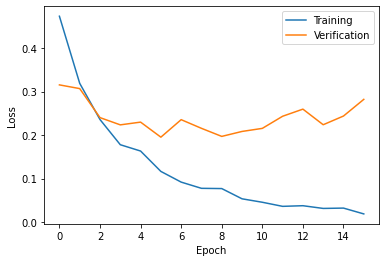

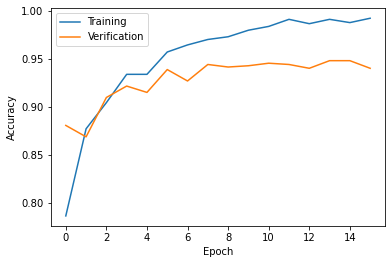

In [21]:
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()